<a href="https://colab.research.google.com/github/danielapavas/Optimizacion/blob/main/Metodo_de_bisecci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

METODO DE BISECCIÓN



In [1]:
import matplotlib.pyplot as plt
import numpy as np


Raíz aproximada: 1.414212942123413


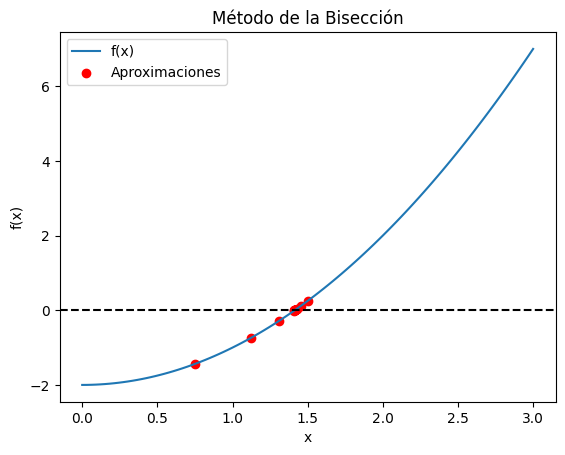


Tabla de datos:
+------------------+----------------------+----------------------+
| Iteración        | Aproximación         | Error                |
+------------------+----------------------+----------------------+
|        1         |      1.50000000      |      0.75000000      |
|        2         |      0.75000000      |      0.37500000      |
|        3         |      1.12500000      |      0.18750000      |
|        4         |      1.31250000      |      0.09375000      |
|        5         |      1.40625000      |      0.04687500      |
|        6         |      1.45312500      |      0.02343750      |
|        7         |      1.42968750      |      0.01171875      |
|        8         |      1.41796875      |      0.00585938      |
|        9         |      1.41210938      |      0.00292969      |
|        10        |      1.41503906      |      0.00146484      |
|        11        |      1.41357422      |      0.00073242      |
|        12        |      1.41430664      |  

In [79]:
def biseccion(funcion, a, b, tolerance, maximo):
    if funcion(a) * funcion(b) >= 0:
        raise ValueError("La función no cumple con el teorema de Bolzano en el intervalo dado.")

    i = 0
    listaError = []
    listaAproximacion = []

    while (b - a) / 2 > tolerance and i < maximo:
        mitad = (a + b) / 2
        listaAproximacion.append(mitad)

        if funcion(mitad) == 0:
            return mitad,listaAproximacion, listaError

        elif funcion(mitad) * funcion(a) < 0:
            b = mitad
        else:
            a = mitad

        error = abs ((b - a) / 2)
        listaError.append(error)
        i += 1

    return (a + b) / 2, listaAproximacion, listaError

#ejemplo
def ejemplo(x):
    return x**2 - 2

a = 0
b = 3
tolerance = 1e-6
maximo = 100

root, listaAproximacion, listaError = biseccion(ejemplo, a, b, tolerance, maximo)
print("\nRaíz aproximada:", root)


# Crear gráfica si hay datos
if listaAproximacion:
    x = np.linspace(a, b, 100)
    y = ejemplo(x)

    plt.plot(x, y, label='f(x)')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.scatter(listaAproximacion, [ejemplo(x) for x in listaAproximacion], color='red', label='Aproximaciones')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.title('Método de la Bisección')
    plt.show()

    # Crear tabla de datos si hay datos
    if listaError:
        print("\nTabla de datos:")
        print("+------------------+----------------------+----------------------+")
        print("| Iteración        | Aproximación         | Error                |")
        print("+------------------+----------------------+----------------------+")
        for i in range(len(listaAproximacion)):
            print(f"| {i+1:^16} | {listaAproximacion[i]:^20.8f} | {listaError[i]:^20.8f} |")
        print("+------------------+----------------------+----------------------+")


METODO DE INTERPOLACIÓN CUADRÁTICA

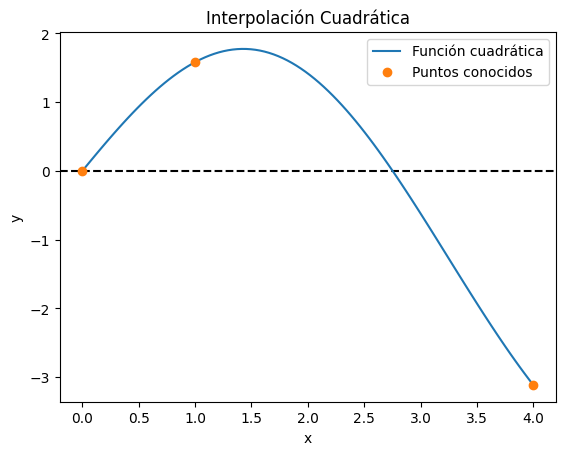

x	y		f(x)	   error
0	0.0		0.0000		0.0000
1	1.582941969615793		1.5829		0.0000
4	-3.1136049906158565		-3.1136		0.0000


In [80]:
# Definir la función cuadrática
def funcionCuadratica(x):
    return 2* np.sin (x) - (x**2)/10 # Cambia los coeficientes según tu función cuadrática

# Datos para evaluar la función
x = np.array([0, 1, 4])
y = funcionCuadratica(x)

# Crear una gráfica de la función cuadrática y los puntos
x_range = np.linspace(min(x), max(x), 100)
y_range = funcionCuadratica(x_range)

plt.axhline(y=0, color='black', linestyle='--')
plt.plot(x_range, y_range, label='Función cuadrática')
plt.plot(x, y, 'o', label='Puntos conocidos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpolación Cuadrática')
plt.show()

# Crear una tabla de datos
print("x\ty\t\tf(x)\t   error")
for i in range(len(x)):
    print(f"{x[i]}\t{y[i]}\t\t{funcionCuadratica(x[i]):.4f}\t\t{y[i] - funcionCuadratica(x[i]):.4f}")
